# AIT Development notebook


## notebook of structure

|#|area name|cell num|description|edit or not|
|---|---|---|---|---|
| 1|flags set|1|setting of launch jupyter or ait flag.|no edit|
| 2|ait-sdk install|1|Use only jupyter launch.<br>find ait-sdk and install.|no edit|
| 3|create requirements and pip install|3|Use only jupyter launch.<br>create requirements.txt.<br>And install by requirements.txt.|should edit(second cell, you set use modules.)|
| 4|import|2|you should write use import modules.<br>but bottom lines do not edit.|should edit(first cell, you import your moduel.)|
| 5|create manifest|1|Use only jupyter launch.<br>create ait.manifest.json.|should edit|
| 6|create input|1|Use only jupyter launch.<br>create ait.input.json.|should edit|
| 7|initialize|1|this cell is initialize for ait progress.|no edit|
| 8|functions|N|you defined measures, resources, downloads in ait.manifesit.json. <br>Define any functions to add these.|should edit|
| 9|main|1|Read the data set or model and calls the function defined in `functions-area`.|should edit|
|10|entrypoint|1|Call the main function.|no edit|
|11|license attribute set|1|Use only notebook launch.<br>Setting attribute for license.|should edit|
|12|prepare deploy|1|Use only notebook launch.<br>Convert to python programs and create dag.py.|no edit|

## notebook template revision history

### 1.0.1 2020/10/21

* add revision history
* separate `create requirements and pip install` editable and noeditable
* separate `import` editable and noeditable

### 1.0.0 2020/10/12

* new cerarion

In [1]:
#########################################
# area:flags set
# do not edit
#########################################

# Determine whether to start AIT or jupyter by startup argument
import sys
is_ait_launch = (len(sys.argv) == 2)

In [2]:
#########################################
# area:ait-sdk install
# do not edit
#########################################
if not is_ait_launch:
    # get ait-sdk file name
    from pathlib import Path
    from glob import glob
    import re

    def numericalSort(value):
        numbers = re.compile(r'(\d+)')
        parts = numbers.split(value)
        parts[1::2] = map(int, parts[1::2])
        return parts
    latest_sdk_file_path=sorted(glob('../lib/*.whl'), key=numericalSort)[-1]

    ait_sdk_name = Path(latest_sdk_file_path).name
    
    # copy to develop dir
    import shutil
    current_dir = %pwd
    shutil.copyfile(f'../lib/{ait_sdk_name}', f'{current_dir}/{ait_sdk_name}')

    # install ait-sdk
    !pip install --upgrade pip
    !pip install --force-reinstall ./$ait_sdk_name

Processing ./ait_sdk-0.1.7-py3-none-any.whl
  Using cached numpy-1.19.3-cp36-cp36m-manylinux2010_x86_64.whl (14.9 MB)
  Using cached psutil-5.7.3-cp36-cp36m-linux_x86_64.whl
  Using cached Keras-2.4.3-py2.py3-none-any.whl (36 kB)
  Using cached py_cpuinfo-7.0.0-py3-none-any.whl
  Using cached nbconvert-6.0.7-py3-none-any.whl (552 kB)
  Using cached nbformat-5.0.8-py3-none-any.whl (172 kB)
  Using cached PyYAML-5.4.1-cp36-cp36m-manylinux1_x86_64.whl (640 kB)
  Using cached h5py-3.1.0-cp36-cp36m-manylinux1_x86_64.whl (4.0 MB)
  Using cached scipy-1.5.4-cp36-cp36m-manylinux1_x86_64.whl (25.9 MB)
  Using cached Pygments-2.9.0-py3-none-any.whl (1.0 MB)
  Using cached defusedxml-0.7.1-py2.py3-none-any.whl (25 kB)
  Using cached jupyterlab_pygments-0.1.2-py2.py3-none-any.whl (4.6 kB)
  Using cached bleach-3.3.0-py2.py3-none-any.whl (283 kB)
  Using cached testpath-0.5.0-py3-none-any.whl (84 kB)
  Using cached nbclient-0.5.3-py3-none-any.whl (82 kB)
  Using cached jupyter_core-4.7.1-py3-none-a

In [3]:
#########################################
# area:create requirements and pip install
# do not edit
#########################################
if not is_ait_launch:
    from ait_sdk.common.files.ait_requirements_generator import AITRequirementsGenerator
    requirements_generator = AITRequirementsGenerator()

In [4]:
#########################################
# area:create requirements and pip install
# should edit
#########################################
if not is_ait_launch:
    requirements_generator.add_package('shap', '0.39.0')
    requirements_generator.add_package('pandas', '1.1.1')
    requirements_generator.add_package('seaborn', '0.10.1')
    requirements_generator.add_package('xgboost', '1.4.2')
    requirements_generator.add_package('scikit-learn', '0.24.2')

In [5]:
#########################################
# area:create requirements and pip install
# do not edit
#########################################
if not is_ait_launch:
    requirements_generator.add_package(f'./{ait_sdk_name}')
    requirements_path = requirements_generator.create_requirements(current_dir)

    !pip install -r $requirements_path 

Processing ./ait_sdk-0.1.7-py3-none-any.whl
ait-sdk is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.


In [6]:
#########################################
# area:import
# should edit
#########################################

# import if you need modules cell
import shap
import xgboost
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from os import path
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [7]:
#########################################
# area:import
# do not edit
#########################################

# must use modules
import shutil  # do not remove
from ait_sdk.common.files.ait_input import AITInput  # do not remove
from ait_sdk.common.files.ait_output import AITOutput  # do not remove
from ait_sdk.common.files.ait_manifest import AITManifest  # do not remove
from ait_sdk.develop.ait_path_helper import AITPathHelper  # do not remove
from ait_sdk.utils.logging import get_logger, log, get_log_path  # do not remove
from ait_sdk.develop.annotation import measures, resources, downloads, ait_main  # do not remove
# must use modules

In [8]:
#########################################
# area:create manifest
# should edit
#########################################
if not is_ait_launch:
    from ait_sdk.common.files.ait_manifest_generator import AITManifestGenerator
    
    manifest_genenerator = AITManifestGenerator(current_dir)
    manifest_genenerator.set_ait_name('alyz_regression_shap')
    manifest_genenerator.set_ait_description('SHAP example of interpretable machine learning for regression problem')
    manifest_genenerator.set_ait_author('AIST')
    manifest_genenerator.set_ait_email('')
    manifest_genenerator.set_ait_version('0.1')
    manifest_genenerator.set_ait_quality('https://airc.aist.go.jp/aiqm/quality/internal/Distribution_of_training_data')
    manifest_genenerator.set_ait_reference('')
    manifest_genenerator.add_ait_inventories(name='data', 
                                             type_='dataset', 
                                             description='regression problem data set', 
                                             format_=['csv'], 
                                             schema='https://www.ietf.org/rfc/rfc4180.txt')
    manifest_genenerator.add_ait_parameters(name='target',  
                                            type_='str', 
                                            description='predication target column', 
                                            default_val='medv')
    manifest_genenerator.add_ait_resources(name='waterfall', 
                                           type_='picture', 
                                           description='waterfall')
    manifest_genenerator.add_ait_resources(name='plots_force', 
                                           type_='picture', 
                                           description='plots_force')
    manifest_genenerator.add_ait_resources(name='plots_scatter', 
                                           type_='picture', 
                                           description='plots_scatter')
    manifest_genenerator.add_ait_resources(name='plots_beeswarm', 
                                           type_='picture', 
                                           description='plots_beeswarm')
    manifest_genenerator.add_ait_resources(name='plots_bar', 
                                           type_='picture', 
                                           description='plots_bar')
    manifest_genenerator.add_ait_downloads(name='Log', 
                                           description='AITLog')
    manifest_path = manifest_genenerator.write()

In [9]:
#########################################
# area:create input
# should edit
#########################################
if not is_ait_launch:
    from ait_sdk.common.files.ait_input_generator import AITInputGenerator
    input_generator = AITInputGenerator(manifest_path)
    input_generator.add_ait_inventories(name='data',
                                        value='data/housing.csv')
    input_generator.set_ait_params(name='target',
                                   value='medv')
    input_generator.write()

In [10]:
#########################################
# area:initialize
# do not edit
#########################################

logger = get_logger()

ait_manifest = AITManifest()
ait_input = AITInput(ait_manifest)
ait_output = AITOutput(ait_manifest)

if is_ait_launch:
    # launch from AIT
    current_dir = path.dirname(path.abspath(__file__))
    path_helper = AITPathHelper(argv=sys.argv, ait_input=ait_input, ait_manifest=ait_manifest, entry_point_dir=current_dir)
else:
    # launch from jupyter notebook
    # ait.input.json make in input_dir
    input_dir = '/usr/local/qai/mnt/ip/job_args/1/1'
    current_dir = %pwd
    path_helper = AITPathHelper(argv=['', input_dir], ait_input=ait_input, ait_manifest=ait_manifest, entry_point_dir=current_dir)

ait_input.read_json(path_helper.get_input_file_path())
ait_manifest.read_json(path_helper.get_manifest_file_path())

### do not edit cell

In [11]:
#########################################
# area:functions\n",
# should edit\n",
#########################################

def ait_param_check(target, data):
    # check target variable for data.columns
    if target not in data.columns:
        print(target, 'target variable is not in data.columns!')
        sys.exit(1)

In [12]:
#########################################
# area:functions
# should edit
#########################################

@log(logger)
@resources(ait_output, path_helper, 'waterfall', 'waterfall.png')
def save_waterfall(shap_values, index, file_path: str=None) -> None:
    # visualize a prediction's explanatio
    shap.plots.waterfall(shap_values[index], show=False)
    plt.savefig(file_path)
    if not is_ait_launch:
        plt.show()
    plt.clf()

In [13]:
#########################################
# area:functions
# should edit
#########################################

@log(logger)
@resources(ait_output, path_helper, 'plots_force', 'plots_force.png')
def save_plots_force(shap_values, index, file_path: str=None) -> None:
    # visualize a prediction's explanation with a force plot
    shap.plots.force(shap_values[index], matplotlib=True, show=False)
    plt.savefig(file_path, bbox_inches="tight")
    if not is_ait_launch:
        plt.show()
    plt.clf()

In [14]:
#########################################
# area:functions
# should edit
#########################################

@log(logger)
@resources(ait_output, path_helper, 'plots_scatter')
def save_plots_scatter(X, shap_values, file_path: str=None) -> None:
    # create a dependence scatter plot to show the effect of a single feature across the whole dataset
    out_files = []
    for column in X.columns:
        shap.plots.scatter(shap_values[:, column], color=shap_values, title=column, show=False)
        plots_path = path.join(file_path, column + '.png')
        plt.savefig(plots_path)
        out_files.append(plots_path)
        if not is_ait_launch:
            plt.show()
        plt.clf()
    return out_files

In [15]:
#########################################
# area:functions
# should edit
#########################################

@log(logger)
@resources(ait_output, path_helper, 'plots_beeswarm', 'plots_beeswarm.png')
def save_plots_beeswarm(shap_values, file_path: str=None) -> None:
    # summarize the effects of all the features
    shap.plots.beeswarm(shap_values, show=False)
    plt.savefig(file_path)
    if not is_ait_launch:
        plt.show()
    plt.clf()

In [16]:
#########################################
# area:functions
# should edit
#########################################

@log(logger)
@resources(ait_output, path_helper, 'plots_bar', 'plots_bar.png')
def save_plots_bar(shap_values, file_path: str=None) -> None:
    # mean absolute value of the SHAP values for each feature
    shap.plots.bar(shap_values, show=False)
    plt.savefig(file_path)
    if not is_ait_launch:
        plt.show()
    plt.clf()

In [17]:
#########################################
# area:functions
# should edit
#########################################

@log(logger)
@downloads(ait_output, path_helper, 'Log', 'ait.log')
def move_log(file_path: str=None) -> str:
    shutil.move(get_log_path(), file_path)

In [18]:
#########################################
# area:main
# should edit
#########################################
    
@log(logger)
@ait_main(ait_output, path_helper)
def main() -> None:
    
    # load inventory
    data = pd.read_csv(ait_input.get_inventory_path('data'))
    
    # missing value processing
    data = data.dropna()
    
    # load param
    target = ait_input.get_method_param_value('target')
    ait_param_check(target, data)
    
    # separate the objective variable default 'target'
    X = data.drop(columns=target)
    y = data[target].values
    
    # data StandardScaler
    scaler = StandardScaler().fit(X)
    X = pd.DataFrame(scaler.transform(X), columns=X.columns)
    
    # creating the xgboost mode
    reg = xgboost.XGBRegressor()

    # hyperparameter search
    reg_cv = GridSearchCV(reg, {'max_depth': [2,4,6], 'n_estimators': [50,100,200]}, verbose=1)
    reg_cv.fit(X, y)
    logger.info(reg_cv.best_params_)
    logger.info(reg_cv.best_score_)

    # train again with optimal parameters.
    reg = xgboost.XGBRegressor(**reg_cv.best_params_)
    reg.fit(X, y)
    
    # explain the model's predictions using SHAP
    # (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
    explainer = shap.Explainer(reg)
    shap_values = explainer(X)
    
    # resource summarize the effects of all the features
    save_plots_beeswarm(shap_values)
    
    # resource mean absolute value of the SHAP values for each feature
    save_plots_bar(shap_values)
    
    # resource visualize the 0 prediction's explanatio
    save_waterfall(shap_values, 0)
    
    # resource visualize the 0 prediction's explanation with a force plot
    save_plots_force(shap_values, 0)

    # resource create a dependence scatter plot to show the effect of a single feature across the whole dataset
    save_plots_scatter(X, shap_values)
    
    # AIT log
    move_log()

Fitting 5 folds for each of 9 candidates, totalling 45 fits


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


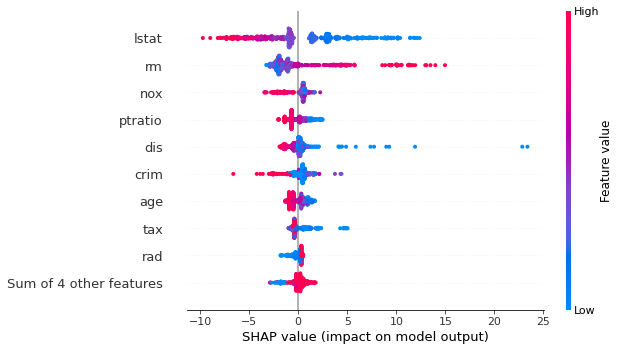

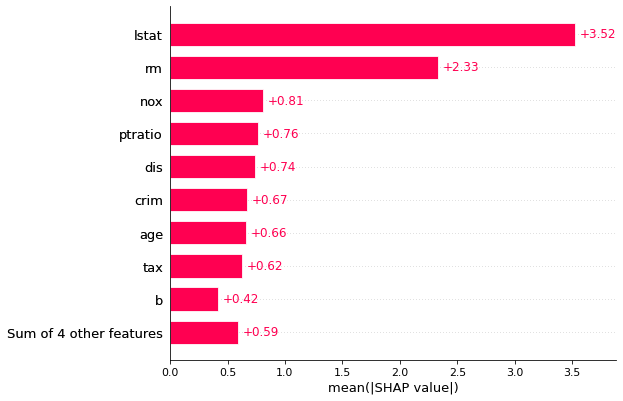

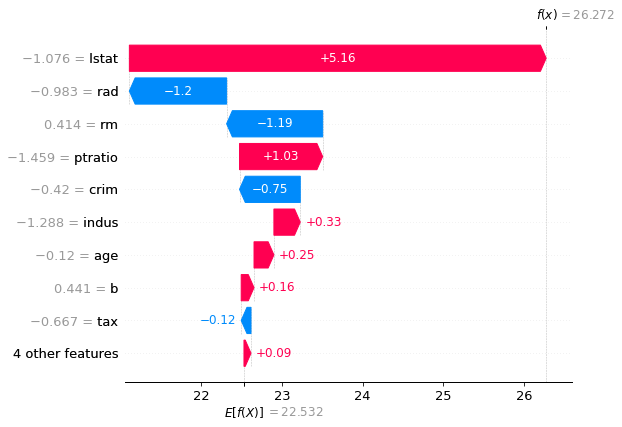

<Figure size 432x288 with 0 Axes>

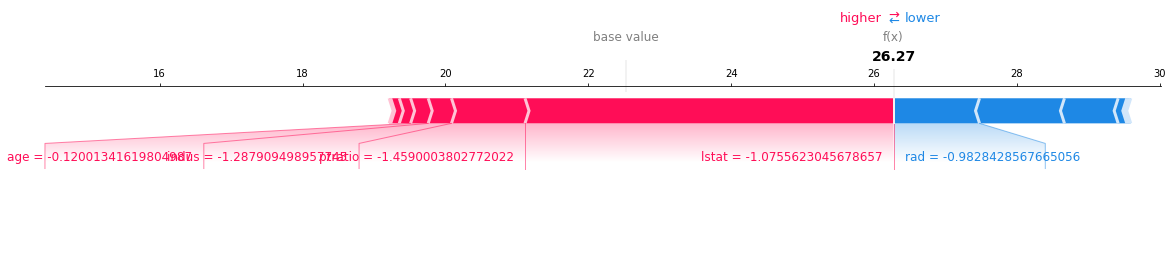

<Figure size 432x288 with 0 Axes>

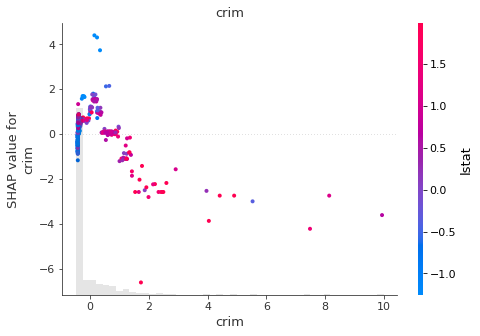

<Figure size 432x288 with 0 Axes>

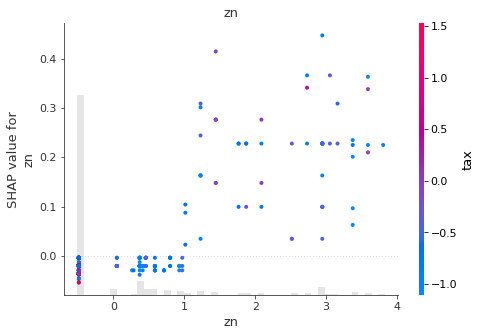

<Figure size 432x288 with 0 Axes>

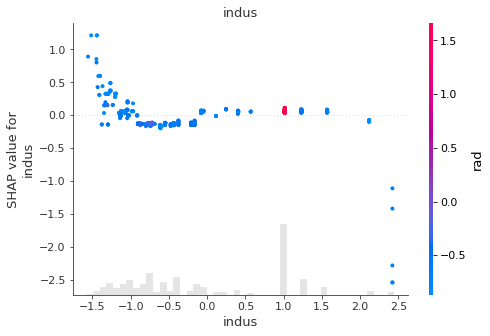

invalid value encountered in true_divide
invalid value encountered in true_divide


<Figure size 432x288 with 0 Axes>

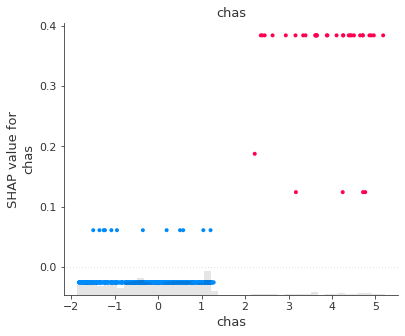

<Figure size 432x288 with 0 Axes>

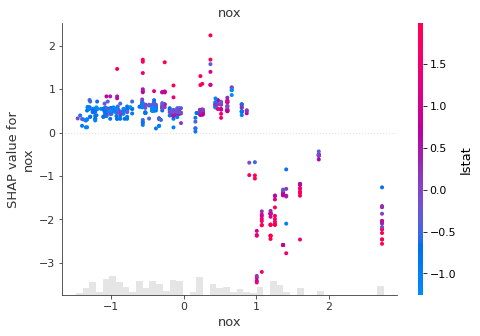

<Figure size 432x288 with 0 Axes>

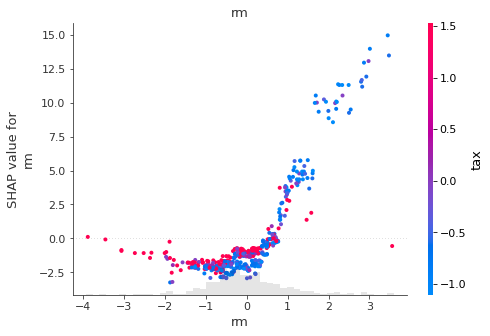

<Figure size 432x288 with 0 Axes>

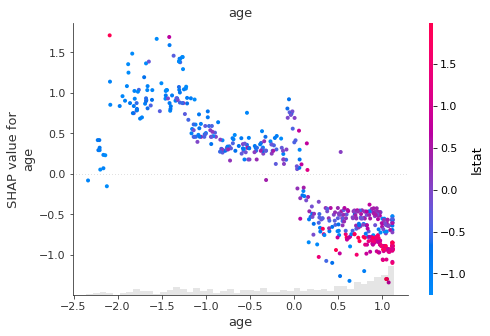

<Figure size 432x288 with 0 Axes>

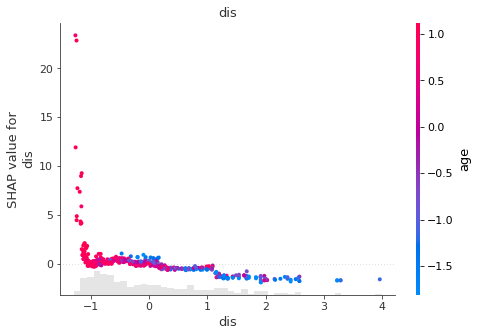

<Figure size 432x288 with 0 Axes>

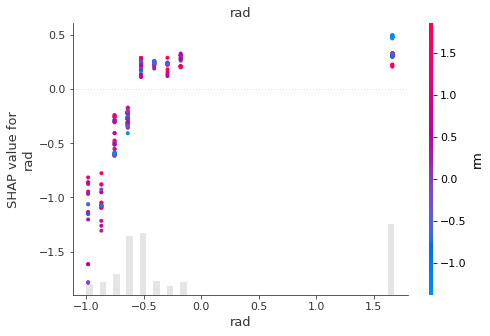

<Figure size 432x288 with 0 Axes>

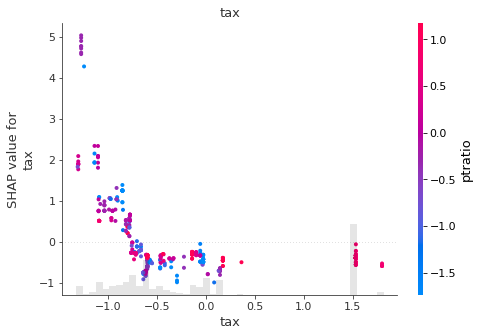

<Figure size 432x288 with 0 Axes>

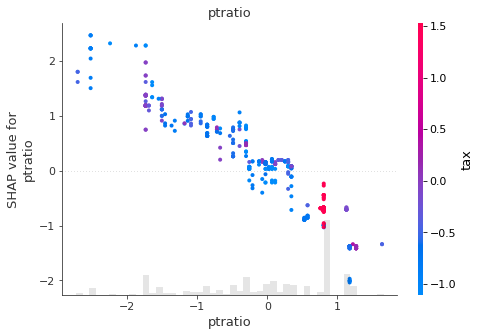

<Figure size 432x288 with 0 Axes>

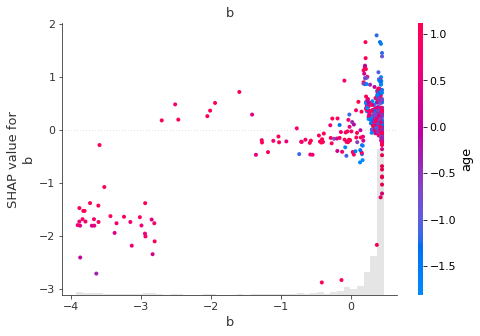

<Figure size 432x288 with 0 Axes>

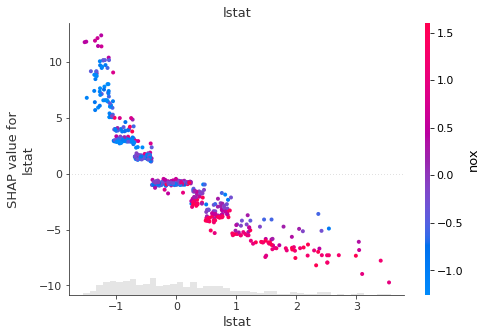

<Figure size 432x288 with 0 Axes>

In [19]:
#########################################
# area:entory point
# do not edit
#########################################
if __name__ == '__main__':
    main()

In [20]:
#########################################
# area:license attribute set
# should edit
#########################################
ait_owner='AIST'
ait_creation_year='2021'

In [21]:
#########################################
# area:prepare deproy
# do not edit
#########################################

if not is_ait_launch:
    from ait_sdk.deploy import prepare_deploy
    from ait_sdk.license.license_generator import LicenseGenerator
    
    current_dir = %pwd
    prepare_deploy(ait_manifest, ait_sdk_name, current_dir, requirements_path, is_remote_deploy=True)
    
    # output License.txt
    license_generator = LicenseGenerator()
    license_generator.write('../top_dir/LICENSE.txt', ait_creation_year, ait_owner)
